<h1>Laboratory work nr. 2</h1>
<p>Scebec Mihai, IS-211M</p>

In [22]:
# imports
from sklearn import *
import matplotlib.pyplot as plt
import pandas as pd
from time import time
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from matplotlib import offsetbox
import seaborn as sns
from keras.datasets import mnist

In [5]:
# 1. Generate swiss-roll dataset
x,y = datasets.make_swiss_roll(n_samples = 2000)

swiss_roll_dataframe = pd.DataFrame(x, columns=['x', 'y', 'z'])
swiss_roll_dataframe['output'] = y

swiss_roll_dataframe.head(10)

,x,y,z,output
0,2.136586,3.951359,-10.981817,11.187730
1,11.844955,19.672883,5.330870,12.989270
2,-8.113438,4.256098,-5.942577,10.056943
3,5.467529,17.498402,4.287641,6.948218
4,11.581824,2.103124,6.001622,13.044467
5,-3.873607,5.538540,7.382670,8.337185
6,-2.621947,10.182603,7.748682,8.180261
7,-1.453736,16.491614,-10.763599,10.861326
8,12.573947,14.082619,0.100300,12.574347
9,0.365166,18.595950,14.106561,14.111286


Here we plot out generated swiss roll. This time I made it in color, unfortunately next times I ommited color and I think this is my mistake
because I assume it could help me analyze the work better. Probably while writing these markdowns I will add color if I have time.

We need to apply a function that reduces amount of dimensions. Since we have 3 dimensions here, I will try n_components = 2 here and later in the file.

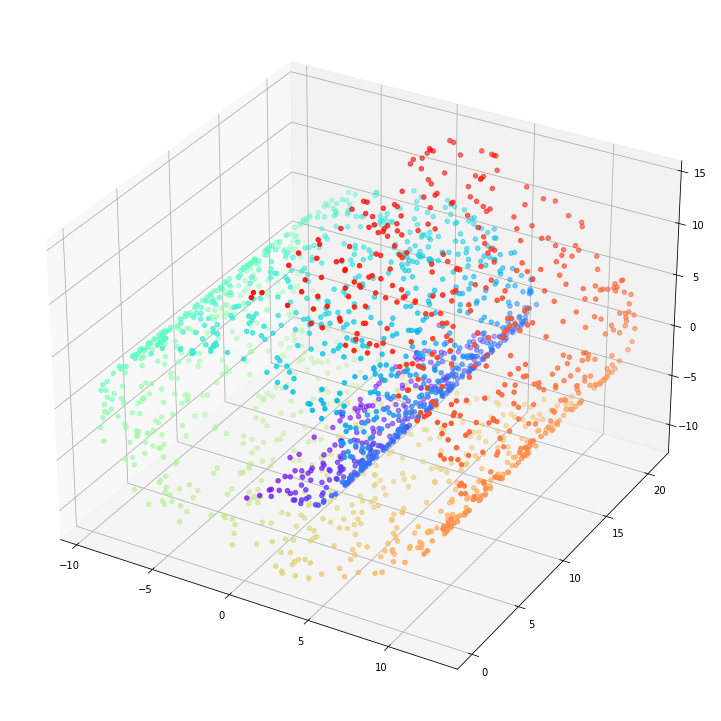

In [6]:
# 2. apply PCA and plot the data
# I assume if we start with 3 columns of training data, we need to make it 2?
pca_fit = decomposition.PCA(n_components=2)
pca_swiss_roll = pd.DataFrame(pca_fit.fit_transform(swiss_roll_dataframe[['x', 'y', 'z']]), columns=['PCA1','PCA2'])
pca_swiss_roll['output'] = swiss_roll_dataframe['output']

fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y, cmap=plt.cm.rainbow)
plt.show()

This is yet another dimension reduction function. Unfortunately there was no single word that I need to plot it, just to find errors. So I didn't plot it, only showed errors.

A couple things to note here is 1) construcror of LLE needed 'eigen_solver' parameter and it would fail in a loop without it for some reason. And 2) I got an unexpected paratemer with a negative error which I assumed to be something interesting. Did I beat machine learning and made a 100.0000000000000001% error proof code? I guess the jypiter just had enough of me and decided to screw me over a bit. 

Also, from my point of view options of neighbot 1 to 8 were similar at least on the plot, but of course most effective of them is 3 
*(or 4? muhahahahahah)

Ok, now this is weird. On another run I got more negative errors. I would be please if someone explains this to me.

2.955875275395633e-17
2
3
4
5
6
7
8
9
10
11
12
13
14
15
neighbor 2 with the error of -1.2642328883985104e-14
neighbor 3 with the error of -1.2021613179401072e-14
neighbor 4 with the error of -2.6584849058430206e-15
neighbor 5 with the error of 8.769405302903903e-17
neighbor 6 with the error of 1.9240819886570646e-09
neighbor 7 with the error of 1.6207843957911156e-09
neighbor 8 with the error of 3.0702310404986077e-09
neighbor 9 with the error of 3.5747254544005664e-09
neighbor 10 with the error of 8.359382024127963e-09
neighbor 11 with the error of 8.85928312395945e-09
neighbor 12 with the error of 7.015089269694465e-08
neighbor 13 with the error of 8.793319848005186e-08
neighbor 14 with the error of 8.795424019702995e-08
neighbor 15 with the error of 1.0437723769062499e-07


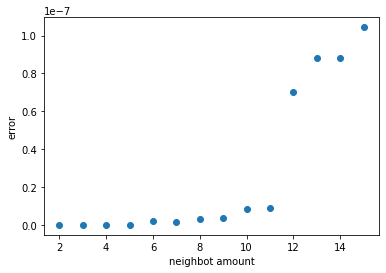

In [10]:
# 3. Apply LLE with 5 neighbours
# again we reduce the dimensions into 2
lle = manifold.LocallyLinearEmbedding(n_neighbors=5, n_components=2, n_jobs=-1)
lle_swiss_roll = pd.DataFrame(lle.fit_transform(swiss_roll_dataframe[['x', 'y', 'z']]), columns = ['LLE1','LLE2'])
lle_swiss_roll['output'] = swiss_roll_dataframe['output']

print(lle.reconstruction_error_)
neighbor_amount = []
errors = []
for nr_of_neighbors in range(2, 16):
    print(nr_of_neighbors)
    lle_loc = manifold.LocallyLinearEmbedding(n_neighbors=nr_of_neighbors, n_components=2, n_jobs=-1, eigen_solver='dense')
    lle_loc.fit_transform(swiss_roll_dataframe[['x', 'y', 'z']])
    neighbor_amount.append(nr_of_neighbors)
    errors.append(lle_loc.reconstruction_error_)


for x, y in zip(neighbor_amount, errors):
    print(f'neighbor %s with the error of %s' % (x, y))

plt.scatter(neighbor_amount, errors)
plt.xlabel('neighbot amount')
plt.ylabel('error')
plt.show()


It is time to apply MDS, and I make my mistake of ignoring the color. Let me write second one with seaborn and fix this.

In [11]:
# 4. use multi dimensional scaling and visualize the dataset in 2 dimensions
mds = manifold.MDS(n_components=2, n_jobs=-1)
mds_swiss_roll = pd.DataFrame(mds.fit_transform(swiss_roll_dataframe[['x', 'y', 'z']]), columns = ['MDS1', 'MDS2'])
mds_swiss_roll['output'] = swiss_roll_dataframe['output']

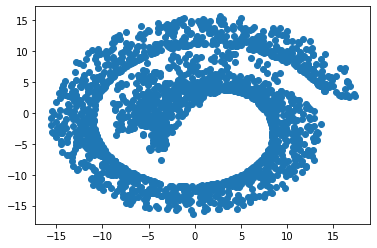

In [12]:
plt.scatter(mds_swiss_roll['MDS1'], mds_swiss_roll['MDS2'])
plt.show()

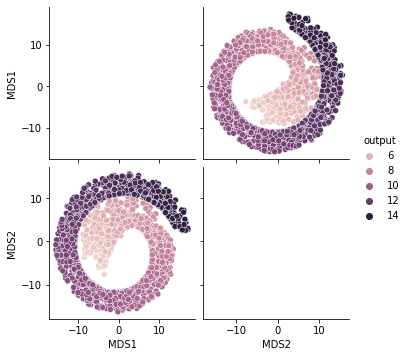

In [13]:
sns.pairplot(data=mds_swiss_roll, hue='output')

Now, when I have output color on the plot, I can clearly see what is where, it is very interesting if you see the 'output' value together with position.

In [15]:
# 5. apply t-SNE model to the dataset and visualize
tsne = manifold.TSNE(n_components=2, n_jobs=-1)
tsne_swiss_roll = pd.DataFrame(tsne.fit_transform(swiss_roll_dataframe[['x', 'y', 'z']]), columns = ['TSNE1', 'TSNE2'])
tsne_swiss_roll['output'] = swiss_roll_dataframe['output']

C:\Users\otaku\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\otaku\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


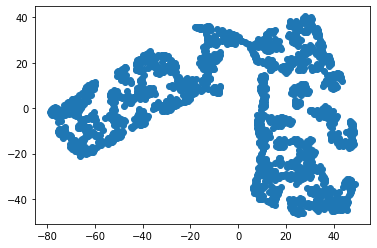

In [16]:
plt.scatter(tsne_swiss_roll['TSNE1'], tsne_swiss_roll['TSNE2'])
plt.show()

Ok, I want to make this in color as well, because this weird figure might seem of a weird shape, but maybe colors will make sense?

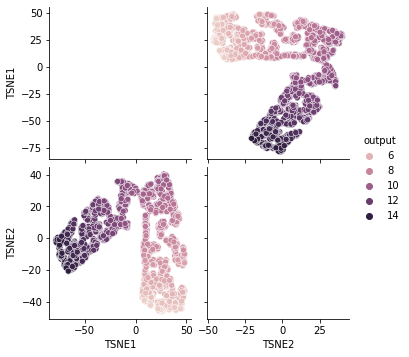

In [17]:
sns.pairplot(data=tsne_swiss_roll, hue='output')

Once again colors prove to have more value than the shape. Yes, the figure is not roll shaped as before, but I have clear vision of what point type is closer to what end of the figure. Anyhow, I would like to leave colored seaborn roll as the best one(mds) because it saves both shape and point positioning well. So, visually it is my winner. What actual numbers tell us about model comparison is later.

In [18]:
# 2.1 import digit dataset with 6 classes
digits = datasets.load_digits(n_class=6)
print(digits)
X, y = digits.data, digits.target
n_samples, n_features = X.shape
n_neighbors = 30

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  9.,  0.,  0.],
       [ 0.,  0.,  0., ...,  4.,  0.,  0.],
       [ 0.,  0.,  6., ...,  6.,  0.,  0.]]), 'target': array([0, 1, 2, ..., 4, 4, 0]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

So, we are working with digits now. Let me just quickly take code from previous lab and draw the digits here and then we continue the exploration. Do I really need mnist for that? and other train variables? No. But it is literally midnight (without 20 minutes) before the exam and I still didn't cover the code with text. Before I just wanted to ask you to look into lab 1 to see digits there.

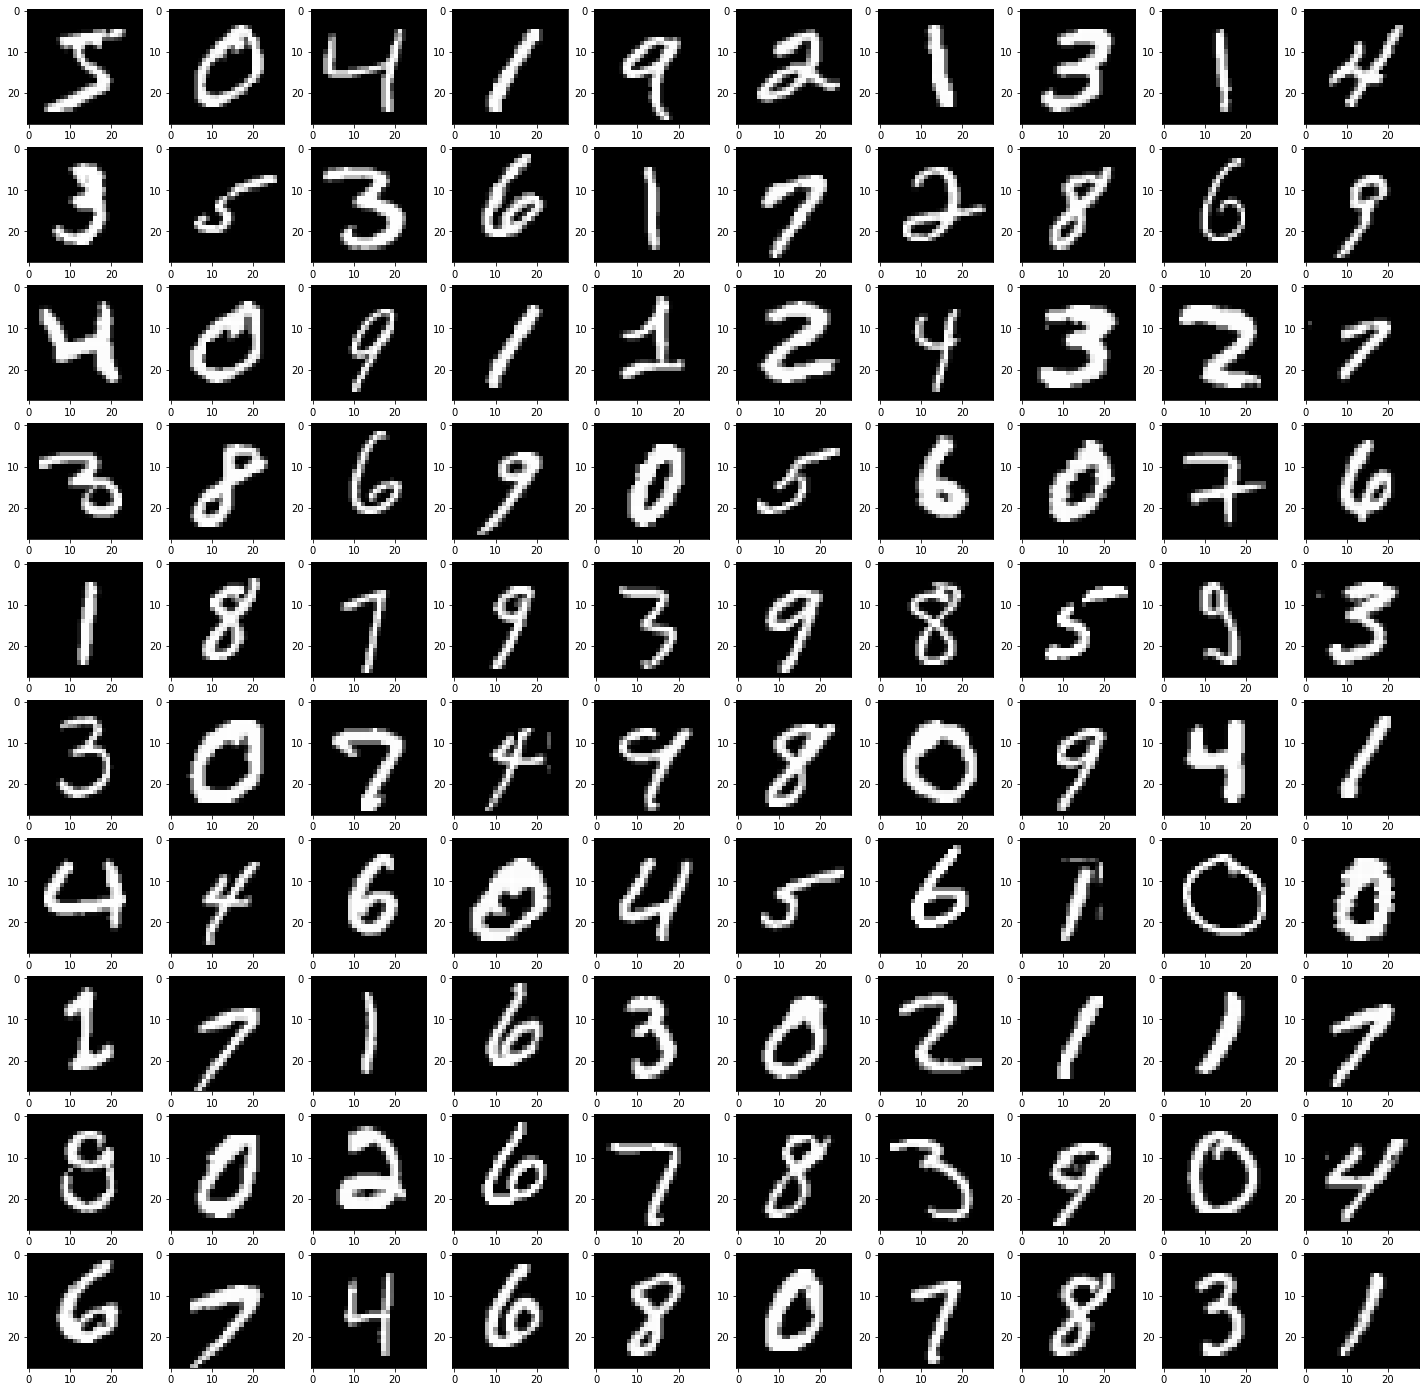

In [23]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
plt.figure(figsize=(25, 25))
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))

plt.show()

In [26]:
# so here is a plot embedding function
def plot_embedding(X, title, ax):
    X = MinMaxScaler().fit_transform(X)
    for digit in digits.target_names:
        ax.scatter(
            *X[y == digit].T,
            marker=f"${digit}$",
            s=60,
            color=plt.cm.Dark2(digit),
            alpha=0.425,
            zorder=2,
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]
        )
        imagebox.set(zorder=1)
        ax.add_artist(imagebox)

    ax.set_title(title)
    ax.axis("off")

In [ ]:
# and now we compare what it seems to be all the techniques from manifold we have in order to see how they perform
embeddings = {
    "Random projection embedding": random_projection.SparseRandomProjection(
        n_components=2, random_state=42
    ),
    "Truncated SVD embedding": decomposition.TruncatedSVD(n_components=2),
    "Linear Discriminant Analysis embedding": discriminant_analysis.LinearDiscriminantAnalysis(
        n_components=2
    ),
    "Isomap embedding": manifold.Isomap(n_neighbors=n_neighbors, n_components=2),
    "Standard LLE embedding": manifold.LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="standard"
    ),
    "Modified LLE embedding": manifold.LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="modified"
    ),
    "Hessian LLE embedding": manifold.LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="hessian"
    ),
    "LTSA LLE embedding": manifold.LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="ltsa"
    ),
    "MDS embedding": manifold.MDS(n_components=2, n_init=1, max_iter=120, n_jobs=2),
    "Random Trees embedding": pipeline.make_pipeline(
        ensemble.RandomTreesEmbedding(n_estimators=200, max_depth=5, random_state=0),
        decomposition.TruncatedSVD(n_components=2),
    ),
    "Spectral embedding": manifold.SpectralEmbedding(
        n_components=2, random_state=0, eigen_solver="arpack"
    ),
    "t-SNE embeedding": manifold.TSNE(
        n_components=2,
        init="pca",
        learning_rate="auto",
        n_iter=500,
        n_iter_without_progress=150,
        n_jobs=2,
        random_state=0,
    ),
    "NCA embedding": neighbors.NeighborhoodComponentsAnalysis(
        n_components=2, init="pca", random_state=0
    ),
}

In [ ]:
# perform projection of the original data
projections, timing = {}, {}
for name, transformer in embeddings.items():
    if name.startswith("Linear Discriminant Analysis"):
        data = X.copy()
        data.flat[:: X.shape[1] + 1] += 0.01  # Make X invertible
    else:
        data = X

    print(f"Computing {name}...")
    start_time = time()
    projections[name] = transformer.fit_transform(data, y)
    timing[name] = time() - start_time

Computing Random projection embedding...
Computing Truncated SVD embedding...
Computing Linear Discriminant Analysis embedding...
Computing Isomap embedding...
Computing Standard LLE embedding...
Computing Modified LLE embedding...
Computing Hessian LLE embedding...
Computing LTSA LLE embedding...
Computing MDS embedding...
Computing Random Trees embedding...
Computing Spectral embedding...
Computing t-SNE embeedding...


C:\Users\otaku\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Computing NCA embedding...


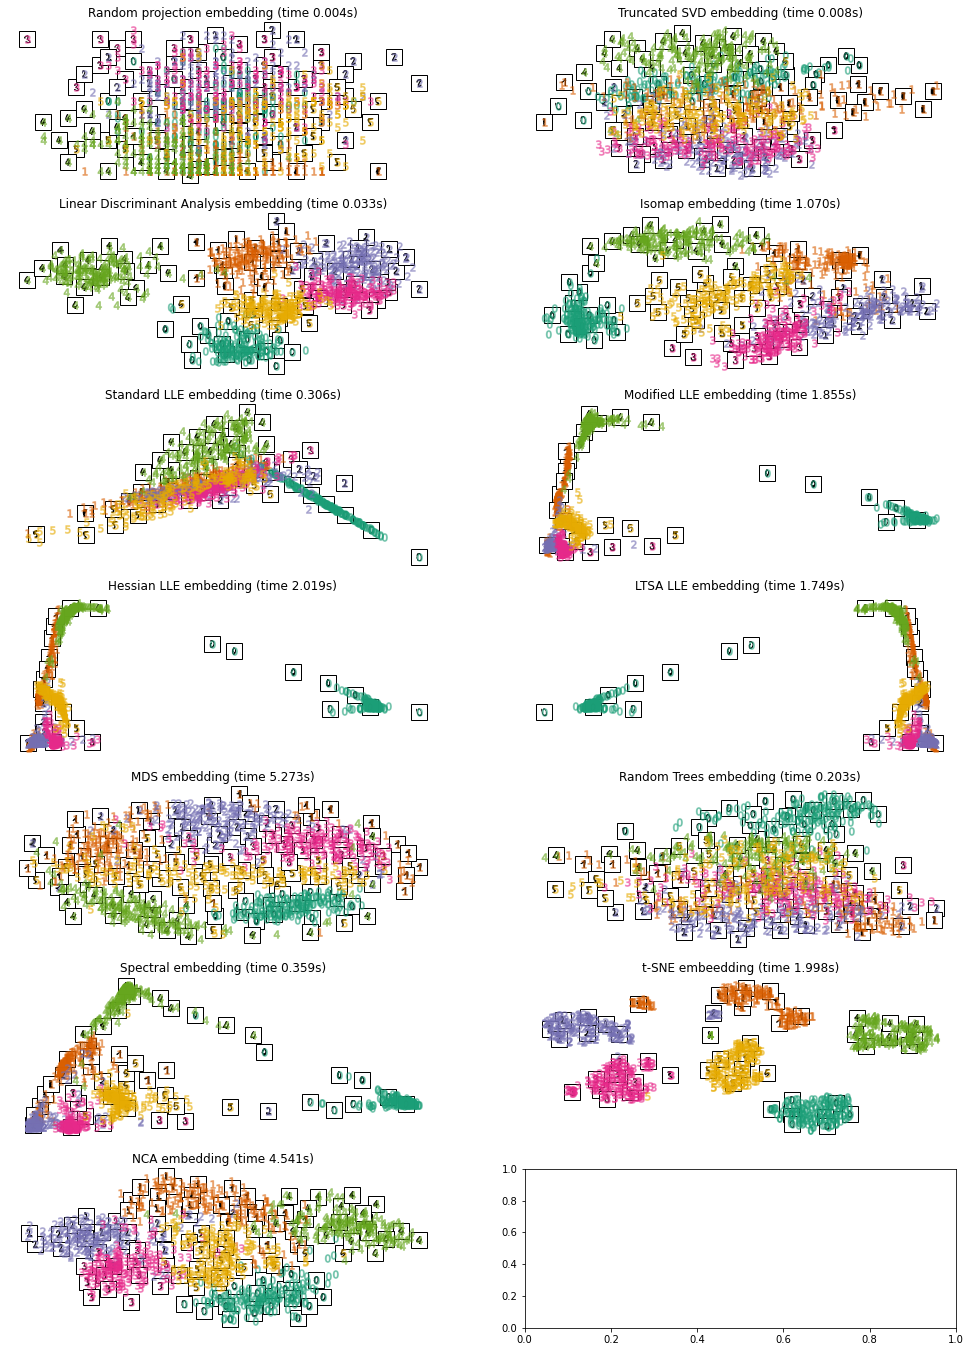

In [ ]:
# plot projections

fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(17, 24))

for name, ax in zip(timing, axs.ravel()):
    if name is None:
        ax.axis("off")
        continue
    title = f"{name} (time {timing[name]:.3f}s)"
    plot_embedding(projections[name], title, ax)

plt.show()

In [ ]:
# calculate errors of all of these with a decision tree.
results = {}
for embedding in embeddings.keys():
    if embedding.startswith("Linear Discriminant Analysis"):
        data = X.copy()
        data.flat[:: X.shape[1] + 1] += 0.01  # invert the x
    else:
        data = X
    print(f"Computing {embedding}")
        
    x_scaled = embeddings[embedding].fit_transform(data, y)
    x_train, x_test, y_train, y_test = model_selection.train_test_split(x_scaled, y, test_size=0.33)
    loc_classifier = tree.DecisionTreeClassifier()
    loc_model = loc_classifier.fit(x_train, y_train)
    y_predicted = loc_model.predict(x_test)
    report = metrics.classification_report(y_test, y_predicted, output_dict=True)
    results[embedding] = [report['weighted avg']['precision'], report['weighted avg']['recall']]

Computing Random projection embedding
Computing Truncated SVD embedding
Computing Linear Discriminant Analysis embedding
Computing Isomap embedding
Computing Standard LLE embedding
Computing Modified LLE embedding
Computing Hessian LLE embedding
Computing LTSA LLE embedding
Computing MDS embedding
Computing Random Trees embedding
Computing Spectral embedding
Computing t-SNE embeedding


C:\Users\otaku\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Computing NCA embedding


In [ ]:
# and the results
for name in results.keys():
    print(name + ' has precision and recall = ' + str(results[name]))
    
results_df = pd.DataFrame(results)
best_precision_recall = results_df.idxmax(axis=1)

print("Best precision achieved with " + str(best_precision_recall[0]) + ' with result of ' + str(results_df.max(axis=1)[0]))
print("Best recall achieved with " + str(best_precision_recall[1] + ' with result of ' + str(results_df.max(axis=1)[1])))

Random projection embedding has precision and recall = [0.37018869000114013, 0.3687150837988827]
Truncated SVD embedding has precision and recall = [0.564530818160953, 0.5614525139664804]
Linear Discriminant Analysis embedding has precision and recall = [0.8747852083823632, 0.8715083798882681]
Isomap embedding has precision and recall = [0.8714230162743889, 0.8687150837988827]
Standard LLE embedding has precision and recall = [0.5851274884861963, 0.5782122905027933]
Modified LLE embedding has precision and recall = [0.9064201203420761, 0.9050279329608939]
Hessian LLE embedding has precision and recall = [0.8916111571685974, 0.8910614525139665]
LTSA LLE embedding has precision and recall = [0.9002857776779088, 0.8966480446927374]
MDS embedding has precision and recall = [0.7942742652586452, 0.7932960893854749]
Random Trees embedding has precision and recall = [0.551529797211802, 0.547486033519553]
Spectral embedding has precision and recall = [0.9010286082632452, 0.8966480446927374]
t-S

I followed the tutorial and once again found colors to be a lot more talkative than blobs or shaped that appear on the plot. But I digress, clearly we are here for the shapes, and this time t-SNE was the best of all models. I see his result as the most distinctive from all others as well as this model has the best precision and recall from all models above. Therefore it is our winner tonight.

During this laboratory work I tried a couple of dimension reduction functions as well as compared models to see which one performs the best. However, unfortunately I am not experienced enough in this to tell some very specific details based on the visualization. My bad, I clearly need more experience and some free time for that.